# Import VINCUSTOMER Data

In [1]:
# Standard data science libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
pd.set_option('display.max_columns', 500)

In [3]:
df = pd.read_csv('../data/vincustomer.csv')

C:\Users\cwei.OM\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning:

Columns (7,88) have mixed types. Specify dtype option on import or set low_memory=False.



In [4]:
df.shape

(6173867, 90)

In [5]:
df.head()

,Organization,birth_dt,Gender,ownership_st_dt,ownership_end_dt,State,Zip_cd,Zip4,lease_ind,Make,Model,ModelYear,InferredPurchase_dt,MaxActivity_dt,Over36_MoRegistration_dt,I1Gender_cd,MosaicHousehold,I1Occupation,CombinedHomeowner,estcurrHomeValue,DwellingType,LengthofResidence,nbofChildren_18orLess,nbofAdultsinHousehold,TTEmailEngagement,TTSavvyresearchersHH,TTOrganicandnaturalHH,TTBrandloyalistsHH,TTTrendsettersHH,TTDealseekersHH,TTRecreationalshoppersHH,TTQualitymattersHH,TTInthemomentshoppersHH,TTMainstreamadoptersHH,TTNoveltyseekersHH,TTSavvyresearchersI1,TTOrganicandnaturalI1,TTBrandloyalistsI1,TTTrendsettersI1,TTDealseekersI1,TTRecreationalshoppersI1,TTQualitymattersI1,TTInthemomentshoppersI1,TTMainstreamadoptersI1,TTNoveltyseekersI1,TTBroadcastCableTVHH,TTDigitalDisplayHH,TTDirectMailHH,TTDigitalNewspaperHH,TTDigitalVideoHH,TTRadioHH,TTStreamingTVHH,TTTraditionalNewspaperHH,TTMobileSMSMMSHH,TTBroadcastCableTVI1,TTDigitalDisplayI1,TTDirectMailI1,TTDigitalNewspaperI1,TTDigitalVideoI1,TTRadioI1,TTStreamingTVI1,TTTraditionalNewspaperI1,TTMobileSMSMMSI1,EthnicityDetail,Religion,Blank,e_TechGroup,CountryofOrigin,TotalEnhancementMatchType,load_dt,hh_income,age,lang_spanish,mosaichousehold_group,education,maritalstatus,wChild,female,recall_cnt,repair_cnt,received_dt,repair_dt,outstanding_cnt,repaired,recall_start_dt,days_to_repair,nhtsazone,nhtsapriority_group,sseostate,enhanced
0,Toyota,NaN,F,NaN,NaN,WY,82009.0,9221,N,Toyota,Corolla,2009.0,11JUN2008,13MAY2019,NaN,F,A02,.,H,530400,S,17,0,3,1.0,3.0,7.0,3.0,5.0,8.0,8.0,4.0,8.0,9.0,9.0,3.0,4.0,3.0,2.0,8.0,6.0,6.0,8.0,8.0,9.0,9.0,9.0,6.0,2.0,9.0,9.0,5.0,8.0,6.0,8.0,9.0,2.0,2.0,9.0,9.0,7.0,5.0,5.0,01,P,NaN,K,0,P,27AUG2019,250000.0,65.0,0,A,3.0,M,0.0,1.0,1.0,1.0,1.837037e+09,23AUG2018,0.0,1.0,09JAN2018,226.0,C,9.0,NaN,1
1,Toyota,NaN,F,NaN,NaN,GA,30529.0,7201,N,Toyota,Corolla,2009.0,15APR2008,17JAN2019,NaN,F,N47,.,H,173700,S,11,0,1,6.0,6.0,5.0,3.0,1.0,7.0,5.0,9.0,6.0,8.0,6.0,6.0,5.0,3.0,1.0,7.0,5.0,9.0,6.0,8.0,6.0,3.0,8.0,5.0,7.0,7.0,6.0,6.0,4.0,6.0,3.0,8.0,5.0,7.0,7.0,6.0,6.0,4.0,6.0,01,P,NaN,K,0,P,27AUG2019,15000.0,49.0,0,N,2.0,M,1.0,1.0,1.0,1.0,1.827619e+09,28APR2018,0.0,1.0,23MAY2016,705.0,A,4.0,NaN,1
2,Toyota,NaN,F,NaN,NaN,HI,96782.0,2756,Y,Toyota,Corolla,2009.0,15APR2019,15APR2019,NaN,F,B10,.,H,907200,A,12,0,1,5.0,3.0,3.0,7.0,3.0,8.0,3.0,8.0,5.0,2.0,4.0,3.0,3.0,7.0,3.0,8.0,3.0,8.0,5.0,2.0,4.0,2.0,2.0,6.0,8.0,1.0,5.0,1.0,9.0,2.0,2.0,2.0,6.0,8.0,1.0,5.0,1.0,9.0,2.0,10,P,NaN,K,0,H,27AUG2019,75000.0,40.0,0,B,1.0,M,NaN,1.0,1.0,0.0,1.827619e+09,NaN,1.0,0.0,23MAY2016,NaN,A,4.0,NaN,1
3,Toyota,NaN,M,NaN,NaN,WI,53105.0,8927,N,Toyota,Corolla,2009.0,05JUN2008,25APR2017,NaN,M,C11,08,H,275400,S,26,0,4,7.0,9.0,9.0,3.0,2.0,4.0,9.0,8.0,9.0,9.0,9.0,9.0,9.0,3.0,2.0,4.0,9.0,8.0,9.0,9.0,9.0,6.0,9.0,4.0,6.0,9.0,9.0,6.0,2.0,9.0,6.0,9.0,4.0,6.0,9.0,9.0,6.0,2.0,9.0,01,P,NaN,K,0,P,27AUG2019,125000.0,68.0,0,C,1.0,M,0.0,0.0,1.0,0.0,1.827619e+09,NaN,1.0,0.0,09JAN2017,NaN,B,8.0,NaN,1
4,Toyota,NaN,F,NaN,NaN,AL,35553.0,2021,N,Toyota,Corolla,2009.0,19JUL2019,19JUL2019,NaN,F,J35,.,H,295700,S,19,0,2,5.0,7.0,7.0,3.0,2.0,3.0,8.0,8.0,7.0,4.0,6.0,6.0,4.0,3.0,1.0,3.0,5.0,9.0,7.0,4.0,5.0,3.0,7.0,6.0,8.0,7.0,7.0,3.0,6.0,8.0,2.0,7.0,4.0,8.0,7.0,6.0,5.0,3.0,7.0,01,P,NaN,K,0,P,27AUG2019,75000.0,41.0,0,J,2.0,M,NaN,1.0,1.0,1.0,1.827619e+09,27JUN2018,0.0,1.0,23MAY2016,765.0,A,4.0,NaN,1


### Tranformation

In [6]:
df.maritalstatus.fillna('U', inplace=True)

In [7]:
education = {
    1: '2 High School',
    2: '3 Some College',
    3: '4 College Degree',
    4: '5 Graduate',
}
df['education2'] = df.education.map(education).fillna('0 Missing')

In [8]:
dwellingtype = {
    'S': 'Single Family',
    'A': 'Multi-Family & Condominiums',
    'M': 'Marginal Multi-Family',
    'P': 'Post Office Box',
    'U': 'Unknown'
}
df['DwellingType2'] = df.DwellingType.map(dwellingtype).fillna('Unknown')

In [9]:
homeowner = {
    'H': 'Homeowner',
    '9': 'Probable Homeowner',
    '8': 'Probable Homeowner',
    '7': 'Probable Homeowner',
    'R': 'Renter',
    'T': 'Probable Renter',
    'U': 'Unknown'
}
df['CombinedHomeowner2'] = df.CombinedHomeowner.map(homeowner).fillna('Unknown') 

In [10]:
mosaic_group = {
    'A': 'A Power Elite',
    'B': 'B Flourishing Families',
    'C': 'C Booming with Confidence',
    'D': 'D Suburban Style',
    'E': 'E Thriving Boomers',
    'F': 'F Promising Families',
    'G': 'G Young City Solos',
    'H': 'H Middle-class Melting Pot',
    'I': 'I Family Union',
    'J': 'J Autumn Years',
    'K': 'K Significant Singles',
    'L': 'L Blue Sky Boomers',
    'M': 'M Families in Motion',
    'N': 'N Pastoral Pride',
    'O': 'O Singles and Starters',
    'P': 'P Cultural Connections',
    'Q': 'Q Golden Year Guardians',
    'R': 'R Aspirational Fusion',
    'S': 'S Economic Challenges',
}
df['mosaichousehold_group2'] = df.mosaichousehold_group.map(mosaic_group)

In [11]:
mosaic_type = {
    'A01': 'A01 American Royalty',
    'A02': 'A02 Platinum Prosperity',
    'A03': 'A03 Kids and Cabernet',
    'A04': 'A04 Picture Perfect Families',
    'A05': 'A05 Couples with Clout',
    'A06': 'A06 Jet Set Urbanites',
    'B07': 'B07 Generational Soup',
    'B08': 'B08 Babies and Bliss',
    'B09': 'B09 Family Fun-tastic',
    'B10': 'B10 Cosmopolitan Achievers',
    'C11': 'C11 Aging of Aquarius',
    'C12': 'C12 Golf Carts and Gourmets',
    'C13': 'C13 Silver Sophisticates',
    'C14': 'C14 Boomers and Boomerangs',
    'D15': 'D15 Sports Utility Families',
    'D16': 'D16 Settled in Suburbia',
    'D17': 'D17 Cul de Sac Diversity',
    'D18': 'D18 Suburban Attainment',
    'E19': 'E19 Full Pockets, Empty Nests',
    'E20': 'E20 No Place Like Home',
    'E21': 'E21 Unspoiled Splendor',
    'F22': 'F22 Fast Track Couples',
    'F23': 'F23 Families Matter Most',
    'G24': 'G24 Status Seeking Singles',
    'G25': 'G25 Urban Edge',
    'H26': 'H26 Progressive Potpourri',
    'H27': 'H27 Birkenstocks and Beemers',
    'H28': 'H28 Everyday Moderates',
    'H29': 'H29 Destination Recreation',
    'I30': 'I30 Stockcars and State Parks',
    'I31': 'I31 Blue Collar Comfort',
    'I32': 'I32 Steadfast Conventionalists',
    'I33': 'I33 Balance and Harmony',
    'J34': 'J34 Aging in Place',
    'J35': 'J35 Rural Escape',
    'J36': 'J36 Settled and Sensible',
    'K37': 'K37 Wired for Success',
    'K38': 'K38 Gotham Blend',
    'K39': 'K39 Metro Fusion',
    'K40': 'K40 Bohemian Groove',
    'L41': 'L41 Booming and Consuming',
    'L42': 'L42 Rooted Flower Power',
    'L43': 'L43 Homemade Happiness',
    'M44': 'M44 Red, White and Bluegrass',
    'M45': 'M45 Diapers and Debit Cards',
    'N46': 'N46 True Grit Americans',
    'N47': 'N47 Countrified Pragmatics',
    'N48': 'N48 Rural Southern Bliss',
    'N49': 'N49 Touch of Tradition',
    'O50': 'O50 Full Steam Ahead',
    'O51': 'O51 Digital Dependents',
    'O52': 'O52 Urban Ambition',
    'O53': 'O53 Colleges and Cafes',
    'O54': 'O54 Striving Single Scene',
    'O55': 'O55 Family Troopers',
    'P56': 'P56 Mid-scale Medley',
    'P57': 'P57 Modest Metro Means',
    'P58': 'P58 Heritage Heights',
    'P59': 'P59 Expanding Horizons',
    'P60': 'P60 Striving Forward',
    'P61': 'P61 Humble Beginnings',
    'Q62': 'Q62 Reaping Rewards',
    'Q63': 'Q63 Footloose and Family Free',
    'Q64': 'Q64 Town Elders',
    'Q65': 'Q65 Senior Discounts',
    'R66': 'R66 Dare to Dream',
    'R67': 'R67 Hope for Tomorrow',
    'S68': 'S68 Small Town Shallow Pockets',
    'S69': 'S69 Urban Survivors',
    'S70': 'S70 Tight Money',
    'S71': 'S71 Tough Times',
}
df['MosaicHousehold2'] = df.MosaicHousehold.map(mosaic_type)

# Experian Match Rates & Model Year

### Import Pivoted Data

In [15]:
df2 = pd.read_csv('../data/enhancement.csv', dtype={'Zip_cd': str, 'ModelYear': str})
df2.shape

(1642336, 7)

In [16]:
df2.head()

,Organization,ModelYear,repaired,State,Zip_cd,cnt,enhanced
0,BMW,2000,0.0,AE,09034,1,0
1,BMW,2000,0.0,AE,09059,1,0
2,BMW,2000,0.0,AE,09173,1,0
3,BMW,2000,0.0,AE,09821,1,0
4,BMW,2000,0.0,AK,99504,2,1


In [17]:
# df2['ModelYear'] = 'MY'+df2.ModelYear.astype(str)
df2.rename(columns={'pct_enhanced': 'MatchRate',
                    'repaired': 'Repaired',
                   'Organization': 'OEM'}, inplace=True)

### VIN Counts By Model Year

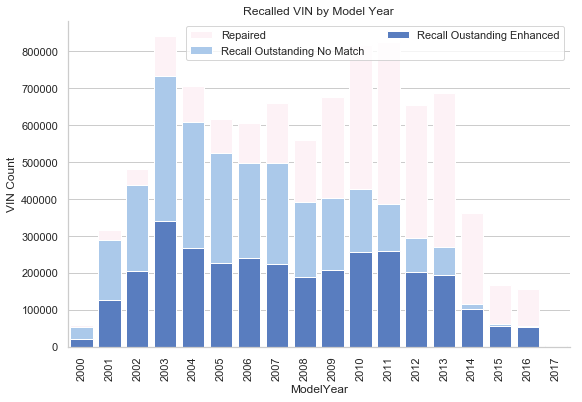

In [52]:
t1 = df2[df2.Repaired==0].groupby('ModelYear').cnt.sum().reset_index()
t1 = pd.concat([t1, df2[df2.Repaired==0].groupby('ModelYear').enhanced.sum().reset_index().iloc[:,1]], axis=1)
t1.rename(columns={'cnt': 'RecallOustanding'}, inplace=True)
t1 = pd.concat([t1, df2.groupby('ModelYear').cnt.sum().reset_index().iloc[:,1]], axis=1)
sns.set(style='whitegrid')
f, ax = plt.subplots(figsize = (9, 6))
plt.title('Recalled VIN by Model Year')
plt.xticks(rotation=90)
sns.set_color_codes('pastel')
sns.barplot(x='ModelYear', y='cnt', data=t1, color='lavenderblush', label='Repaired')
sns.set_color_codes('pastel')
sns.barplot(x='ModelYear', y='RecallOustanding', data=t1, color='b', label='Recall Outstanding No Match')
sns.set_color_codes('muted')
sns.barplot(x='ModelYear', y='enhanced', data=t1, color='b', label='Recall Oustanding Enhanced')
ax.legend(ncol=2, loc='upper right', frameon=True)
ax.set(ylabel='VIN Count')
sns.despine(right=True, top=True)

### Match Rates By Model Year

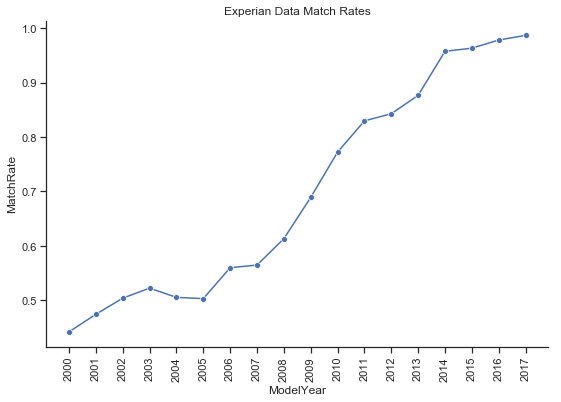

In [72]:
t1 = df2.groupby(['ModelYear']).cnt.sum().reset_index()
t1 = pd.concat([t1, df2.groupby(['ModelYear']).enhanced.sum().reset_index().iloc[:, 1]], axis=1)
t1['MatchRate'] = t1.enhanced/t1.cnt
# px.line(t1, x='ModelYear', y='MatchRate', title = 'Experian Data Match Rates',
#         template='plotly_white')
sns.set(style='ticks')
f, ax = plt.subplots(figsize = (9, 6))
plt.title('Experian Data Match Rates')
plt.xticks(rotation=90)
sns.lineplot(x='ModelYear', y='MatchRate', data=t1, marker='o')
sns.despine(top=True, right=True)

### Match Rates - Repaired vs. Not

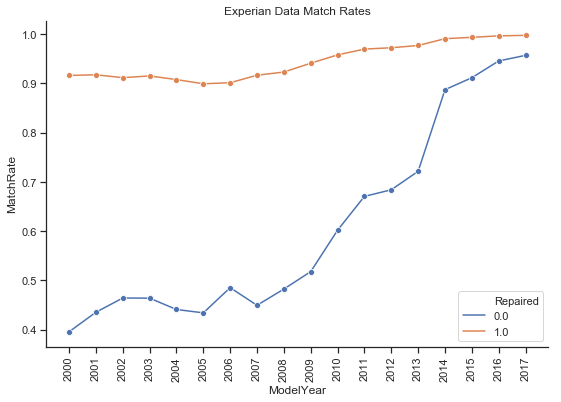

In [73]:
t1 = df2.groupby(['ModelYear', 'Repaired']).cnt.sum().reset_index()
t1 = pd.concat([t1, df2.groupby(['ModelYear', 'Repaired']).enhanced.sum().reset_index().iloc[:, 2]], axis=1)
t1['MatchRate'] = t1.enhanced/t1.cnt
# fig = px.line(t1, x='ModelYear', y='MatchRate', color = 'Repaired',
#               title = 'Experian Data Match Rates', template='plotly_white')
# fig.update_layout(legend=dict(x=0.8, y=0.1))
sns.set(style='ticks')
f, ax = plt.subplots(figsize = (9, 6))
plt.title('Experian Data Match Rates')
plt.xticks(rotation=90)
sns.lineplot(x='ModelYear', y='MatchRate', hue='Repaired', data=t1, marker='o')
sns.despine(top=True, right=True)

### Match Rates By OEM

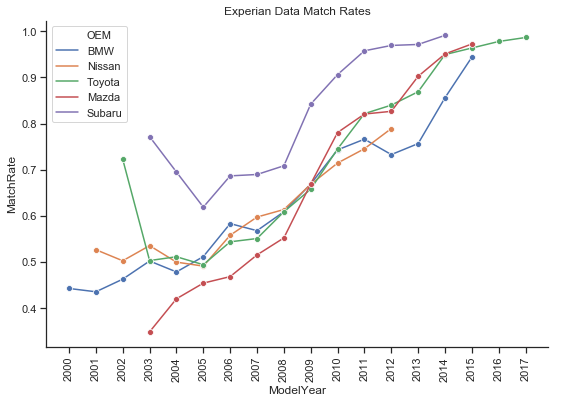

In [74]:
t1 = df2.groupby(['ModelYear', 'OEM']).cnt.sum().reset_index()
t1 = pd.concat([t1, df2.groupby(['ModelYear', 'OEM']).enhanced.sum().reset_index().iloc[:, 2]], axis=1)
t1['MatchRate'] = t1.enhanced/t1.cnt
# fig = px.line(t1, x='ModelYear', y='MatchRate', color='OEM',
#         title = 'Experian Data Match Rates', template='plotly_white')
# fig.update_layout(legend=dict(x=0.8, y=0.1))
sns.set(style='ticks')
f, ax = plt.subplots(figsize = (9, 6))
plt.title('Experian Data Match Rates')
plt.xticks(rotation=90)
sns.lineplot(x='ModelYear', y='MatchRate', hue='OEM', data=t1, marker='o')
sns.despine(top=True, right=True)

### Match Rates By State (Recall Active)

In [18]:
t1 = df2[(df2.Repaired==0)].groupby(['State']).cnt.sum().reset_index()
t1 = pd.concat([t1, df2[(df2.Repaired==0)].groupby(['State']).enhanced.sum().reset_index().iloc[:, 1]], axis=1)
t1['MatchRate'] = t1.enhanced/t1.cnt
fig = go.Figure(data=go.Choropleth(
               locations=t1['State'],
               z=t1['MatchRate'],
               locationmode='USA-states',
               marker_line_color='white',
               colorbar_title='Match Rate'))
fig.update_layout(
    title_text='Experian Match Rate by States',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'))
fig.show(renderer='notebook_connected')

# Repair Rates

In [ ]:
# find columns want to include for analysis
cols = [x for x in df.select_dtypes(include=['int64', 'float64']).columns]

In [75]:
cols = ['Organization','ModelYear','hh_income','education2','maritalstatus','Gender','mosaichousehold_group',
        'CombinedHomeowner2','DwellingType2','lang_spanish',
        'nbofChildren_18orLess','nbofAdultsinHousehold',
        'nhtsapriority_group','nhtsazone','recall_cnt']

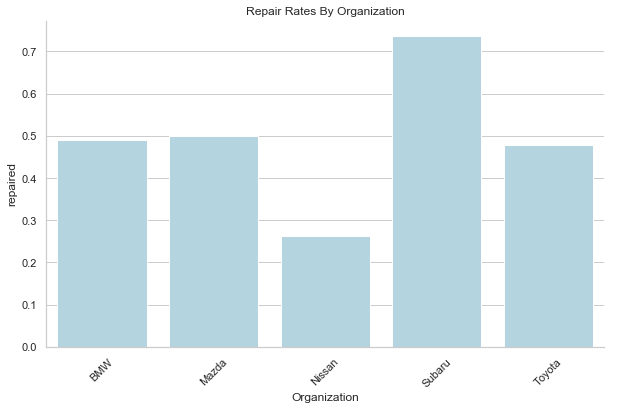

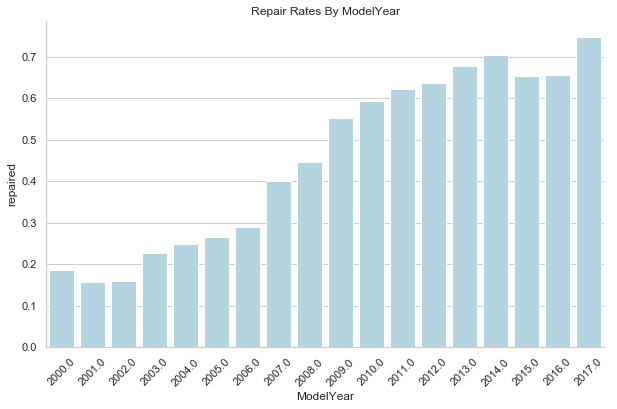

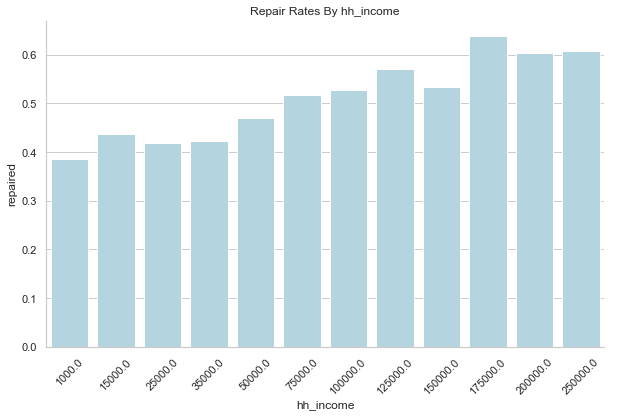

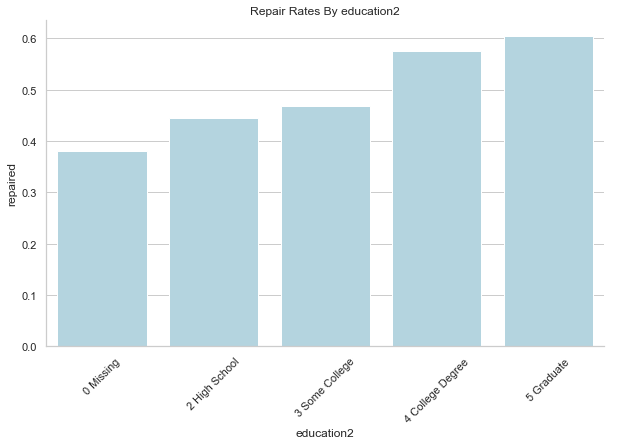

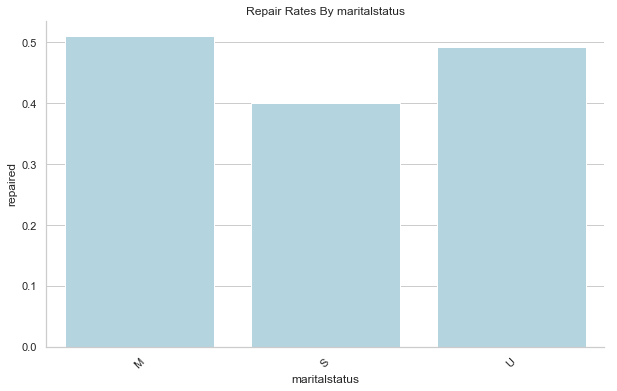

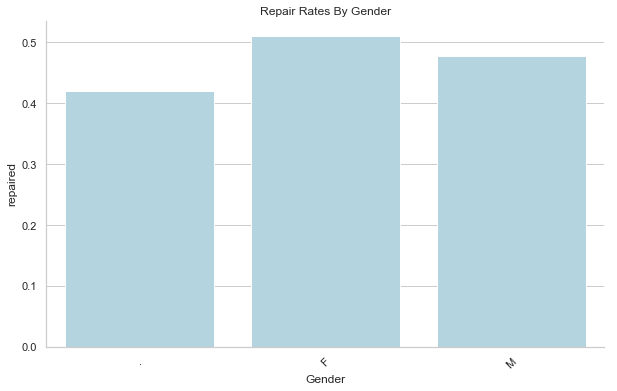

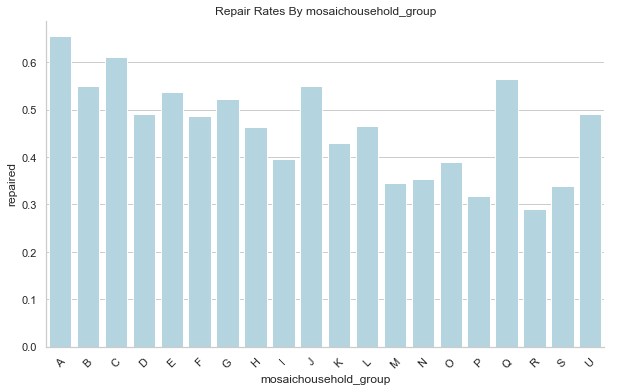

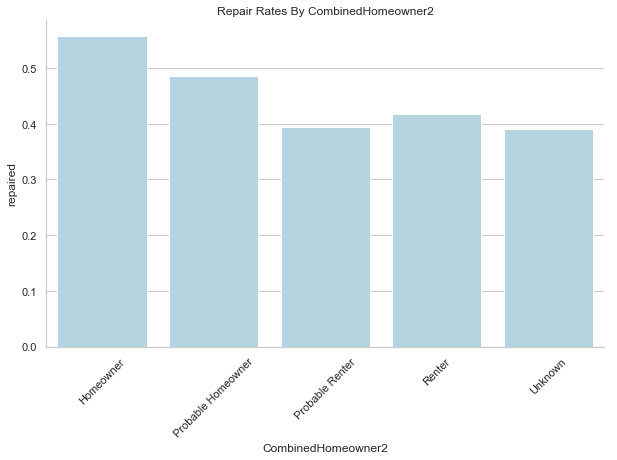

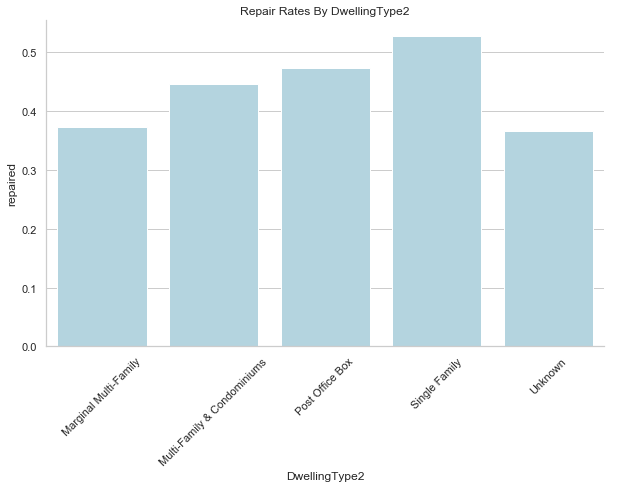

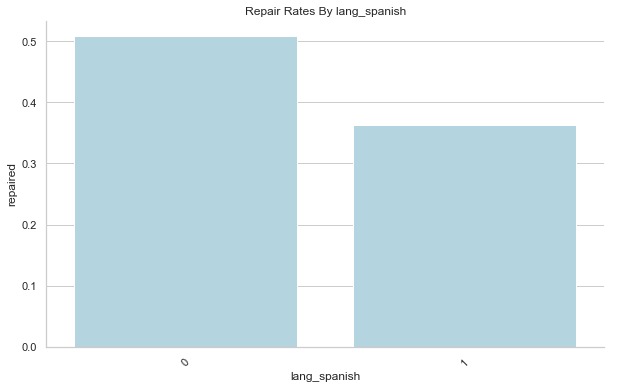

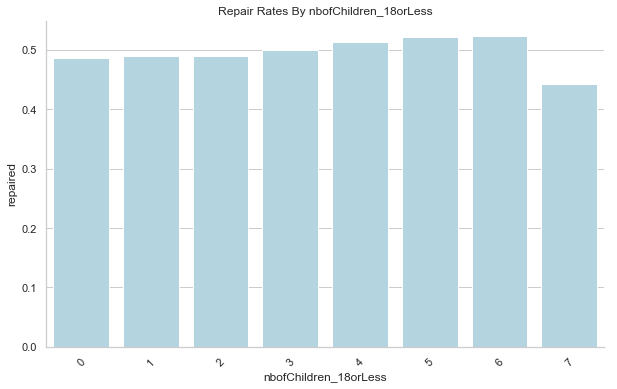

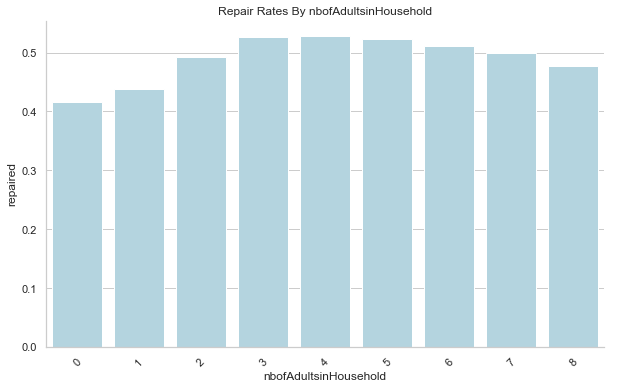

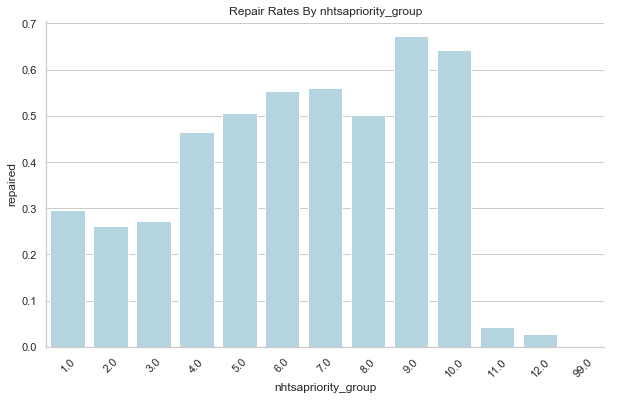

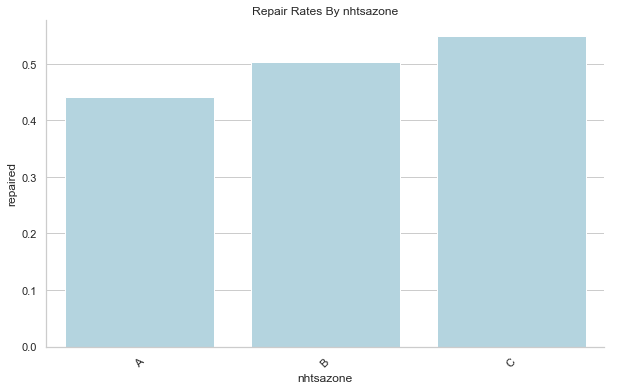

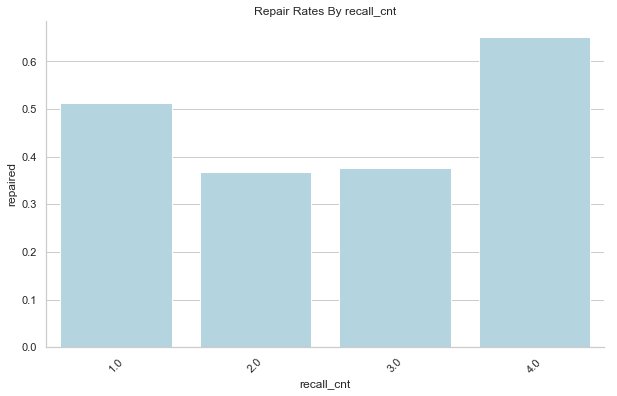

In [76]:
for i in cols:
    t1 = df.groupby(i).repaired.mean().reset_index()
    plt.subplots(figsize=(10, 6))
    sns.barplot(x=i, y='repaired', data=t1, color='lightblue')
    plt.xticks(rotation=45)
    plt.title('Repair Rates By '+i)
    sns.despine(top=True, right=True)

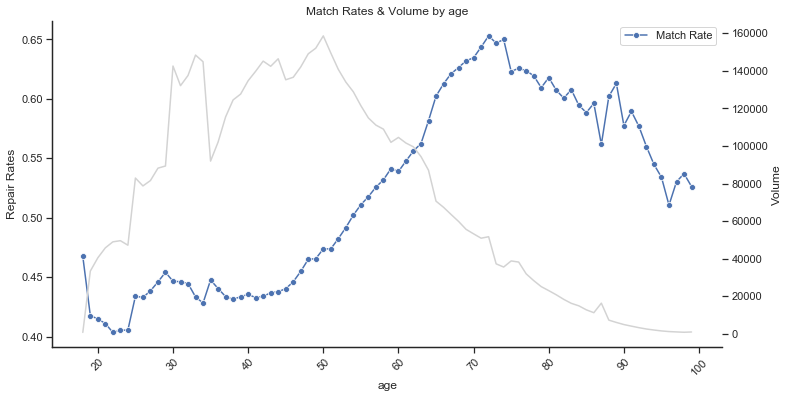

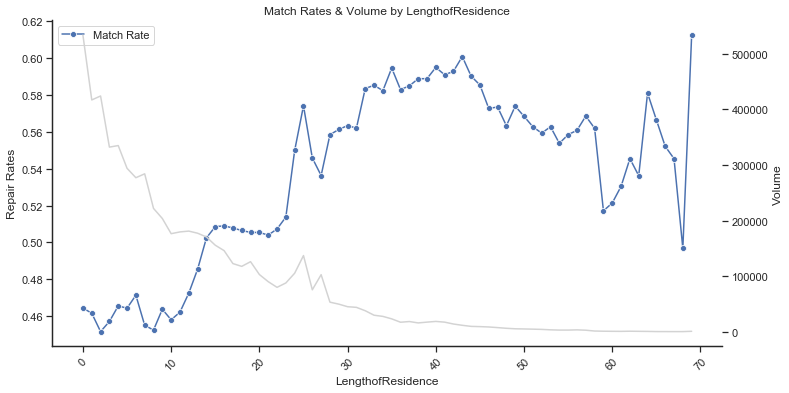

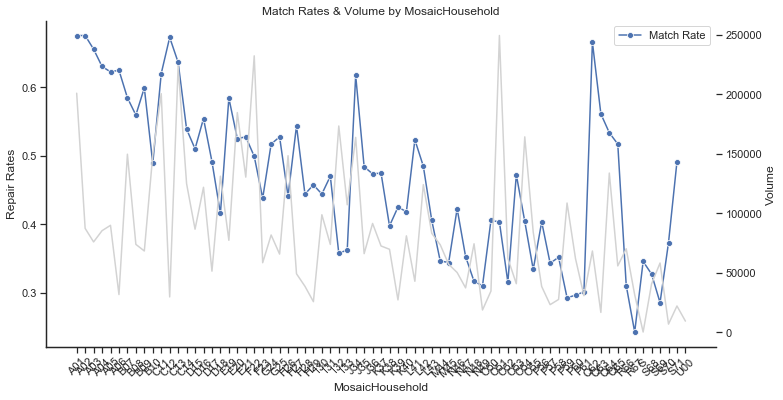

In [80]:
cols = ['age', 'LengthofResidence', 'MosaicHousehold']
for i in cols:
    t1 = df.groupby(i).repaired.mean().reset_index()
    t2 = df.groupby(i).repaired.count().reset_index()
    sns.set(style='ticks')
    plt.subplots(figsize=(12, 6))
    plt.xticks(rotation = 45)
    plt.title('Match Rates & Volume by '+i)
    sns.lineplot(x=i, y='repaired', data=t1, marker='o')
    plt.legend(['Match Rate'])
    plt.ylabel('Repair Rates')
    ax2 = plt.twinx()
    sns.lineplot(x=i, y='repaired', data=t2, color='lightgrey')
    plt.ylabel('Volume')
    sns.despine(top=True)

### Repair Rates By States

In [20]:
t1 = df.groupby(['State']).enhanced.sum().reset_index()
t1 = pd.concat([t1, df.groupby(['State']).repaired.sum().reset_index().iloc[:, 1]], axis=1)
t1['RepairRate'] = t1.repaired/t1.enhanced
fig = go.Figure(data=go.Choropleth(
               locations=t1['State'],
               z=t1['RepairRate'],
               locationmode='USA-states',
               marker_line_color='white',
               colorbar_title='Repair Rate'))
fig.update_layout(
    title_text='Experian Repair Rate by States',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'))
fig.show(renderer='notebook_connected')

# Days to Repair

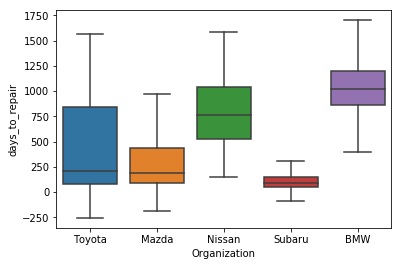

In [12]:
sns.boxplot(y='days_to_repair', x='Organization', data=df[df.repaired==1], showfliers=False)

# Repaired vs. Not-Repaired By OEM

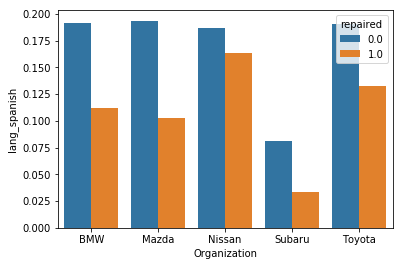

In [42]:
t1 = df.groupby(['Organization', 'repaired']).lang_spanish.mean().reset_index()
sns.barplot(x='Organization', y='lang_spanish', hue='repaired', data=t1)

In [61]:
cols = [x for x in df.select_dtypes(include=['float64', 'int64']).columns]
cols.remove('days_to_repair')

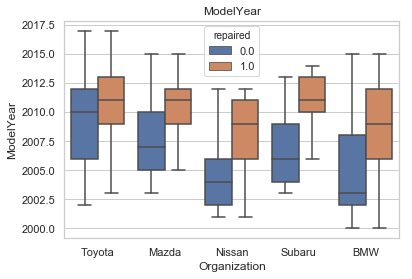

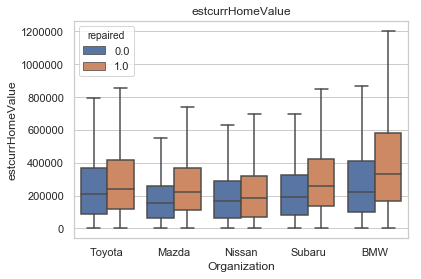

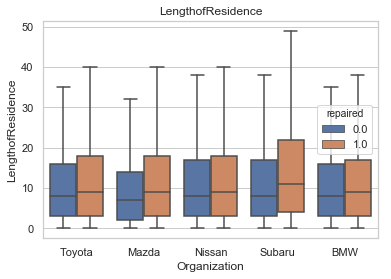

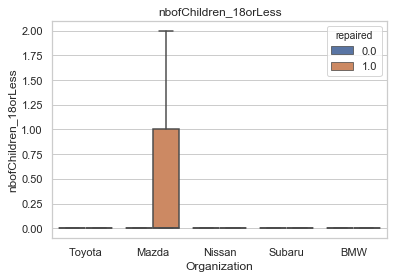

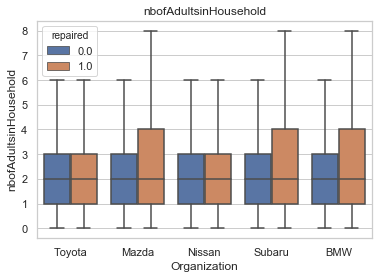

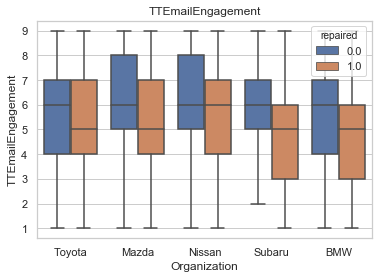

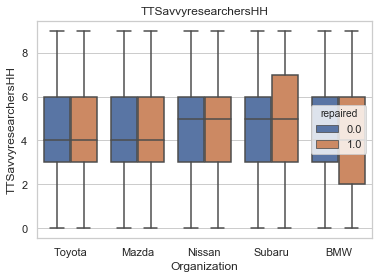

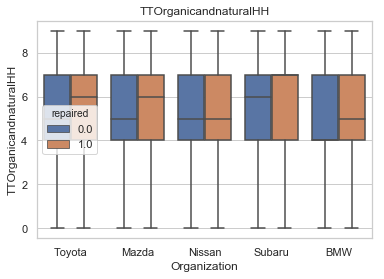

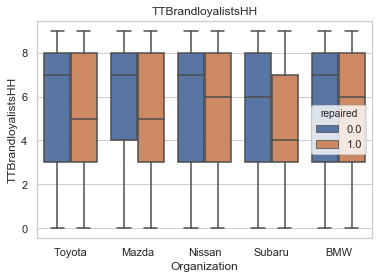

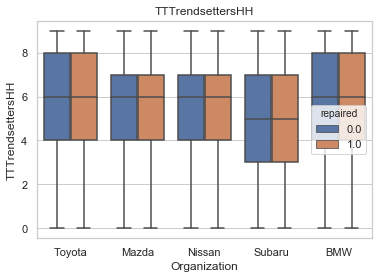

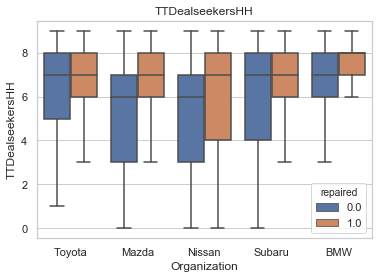

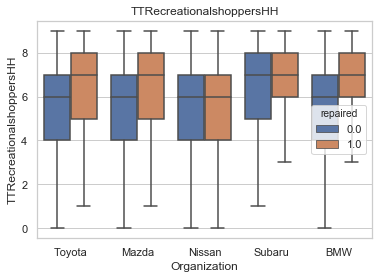

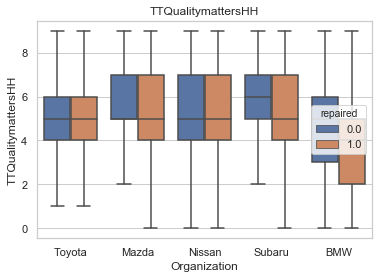

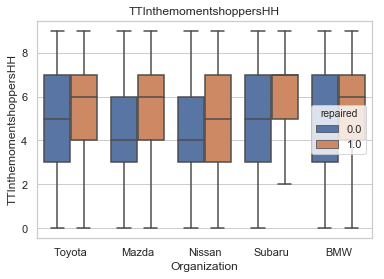

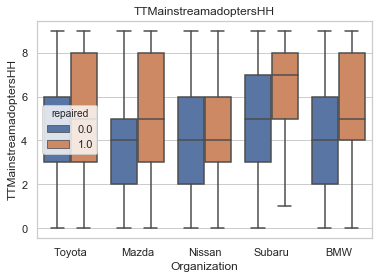

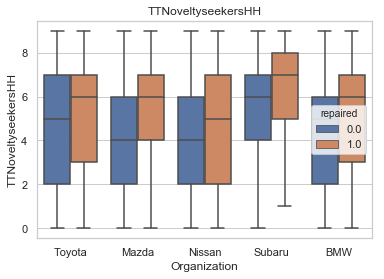

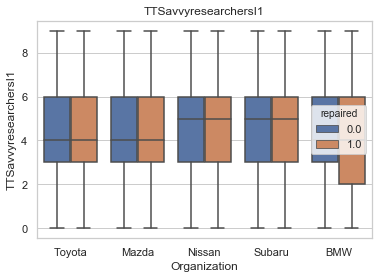

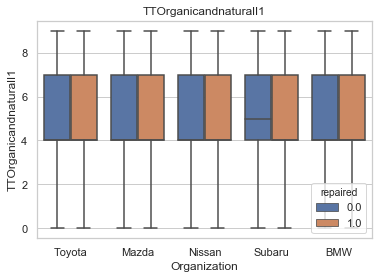

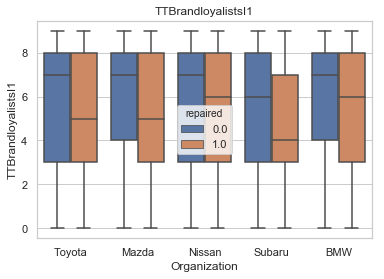

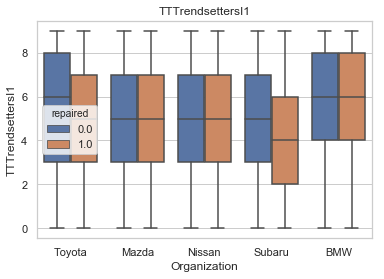

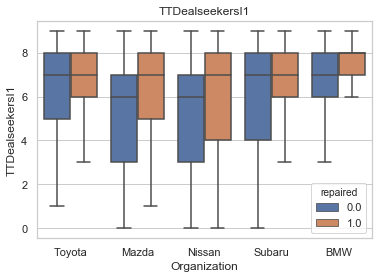

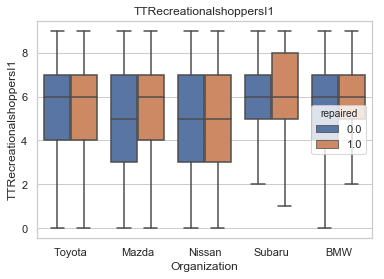

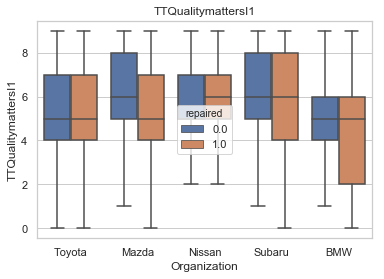

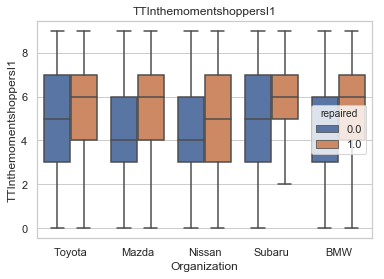

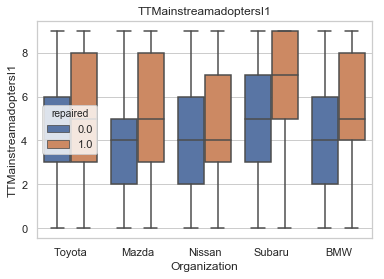

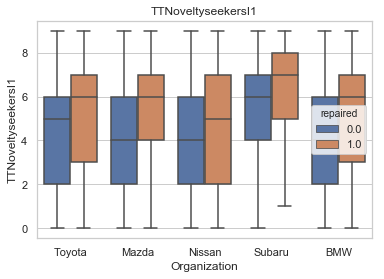

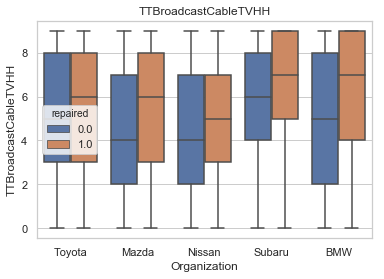

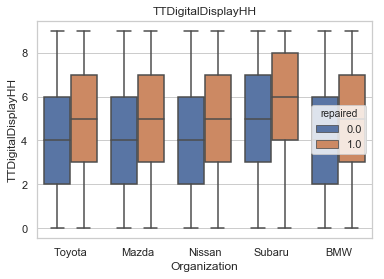

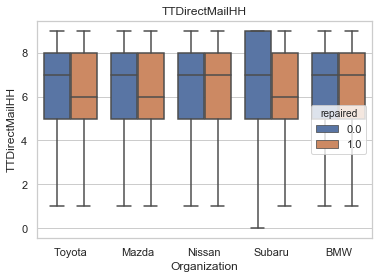

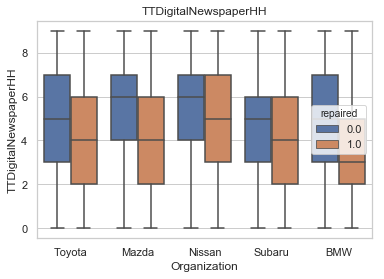

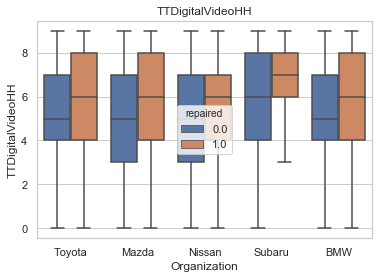

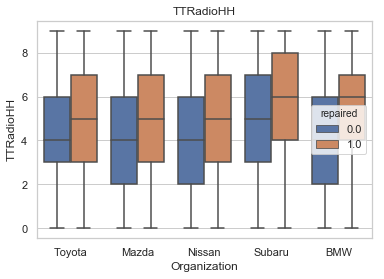

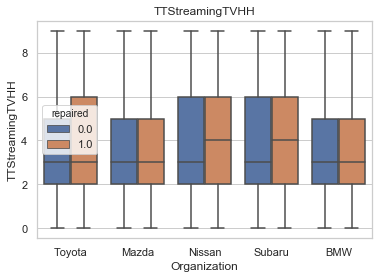

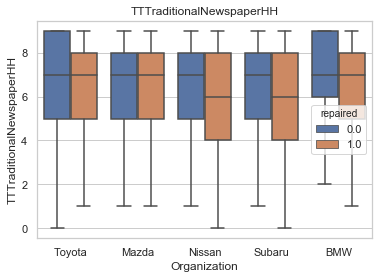

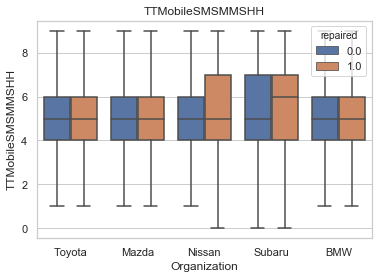

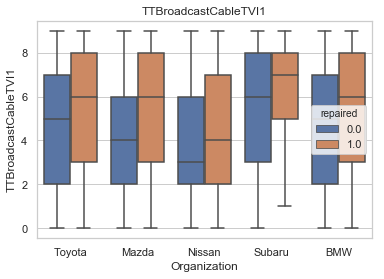

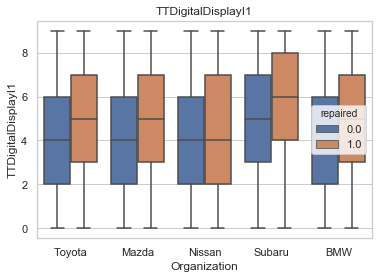

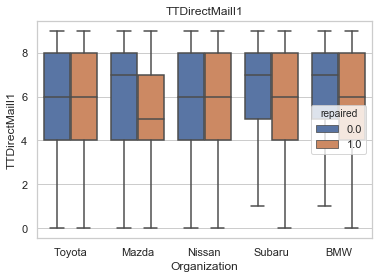

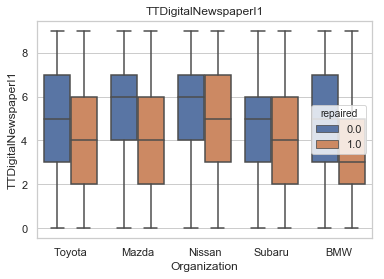

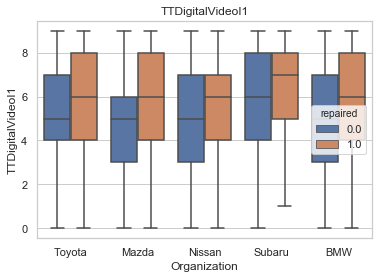

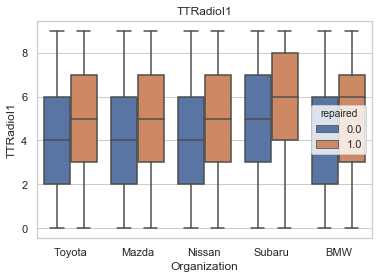

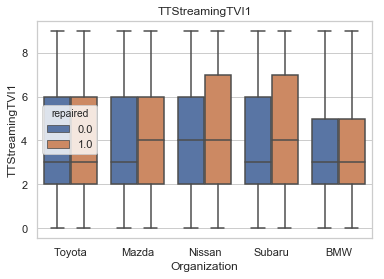

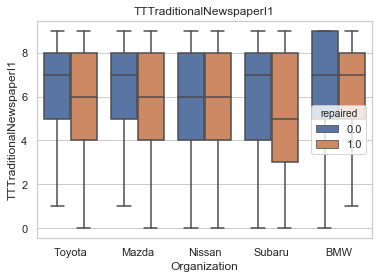

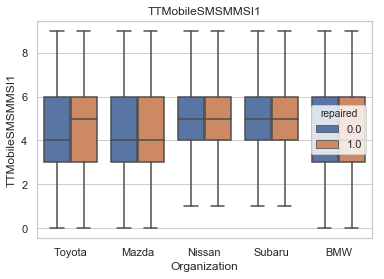

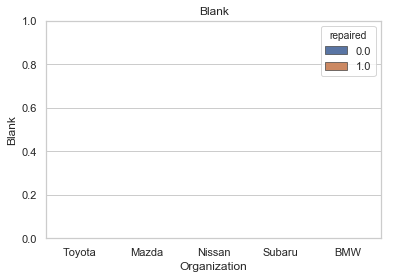

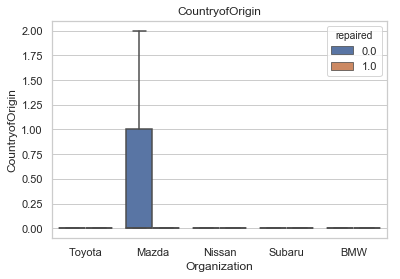

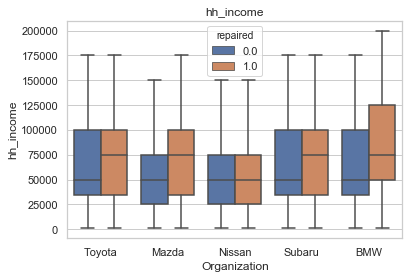

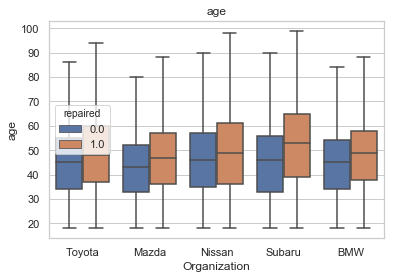

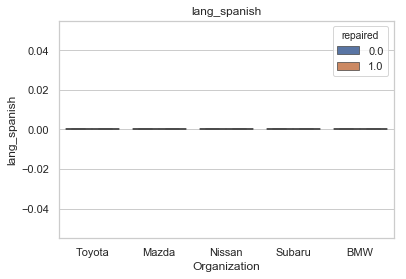

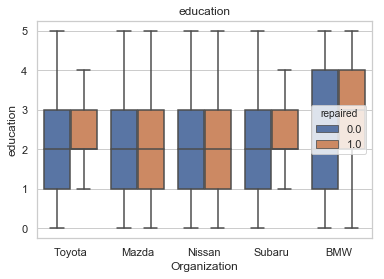

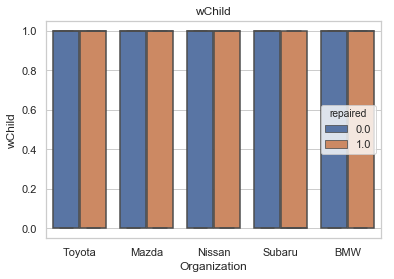

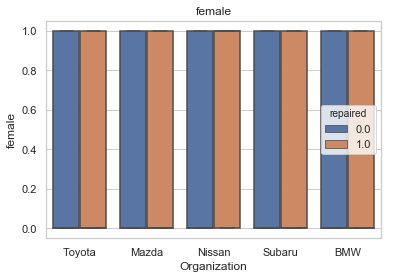

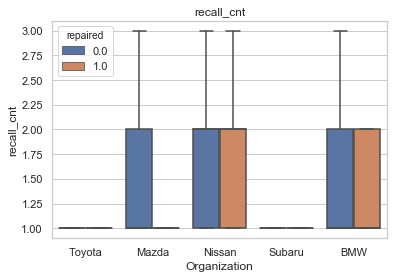

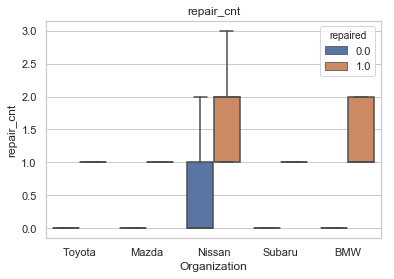

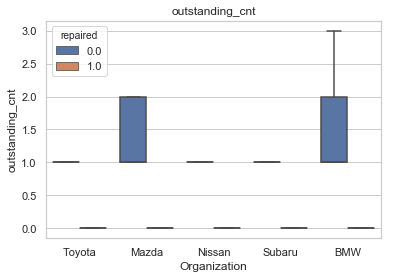

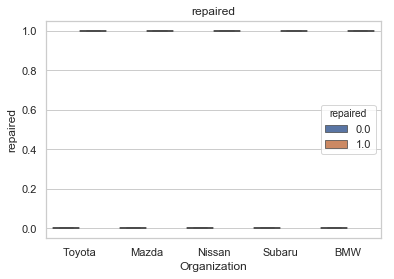

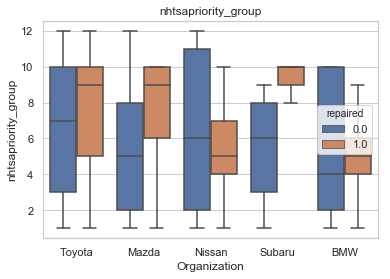

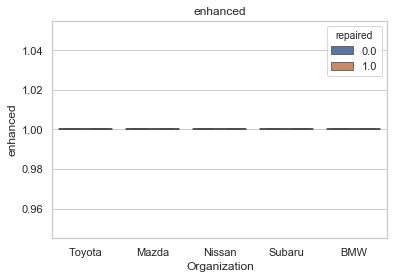

In [69]:
for i in cols[4:]:
    plt.title(i)
    sns.boxplot(x='Organization', y=i, hue='repaired', data=df, showfliers=False)
    plt.show()

# Mosaic Segmentation

## Segment Group Repair vs. Not Repaired

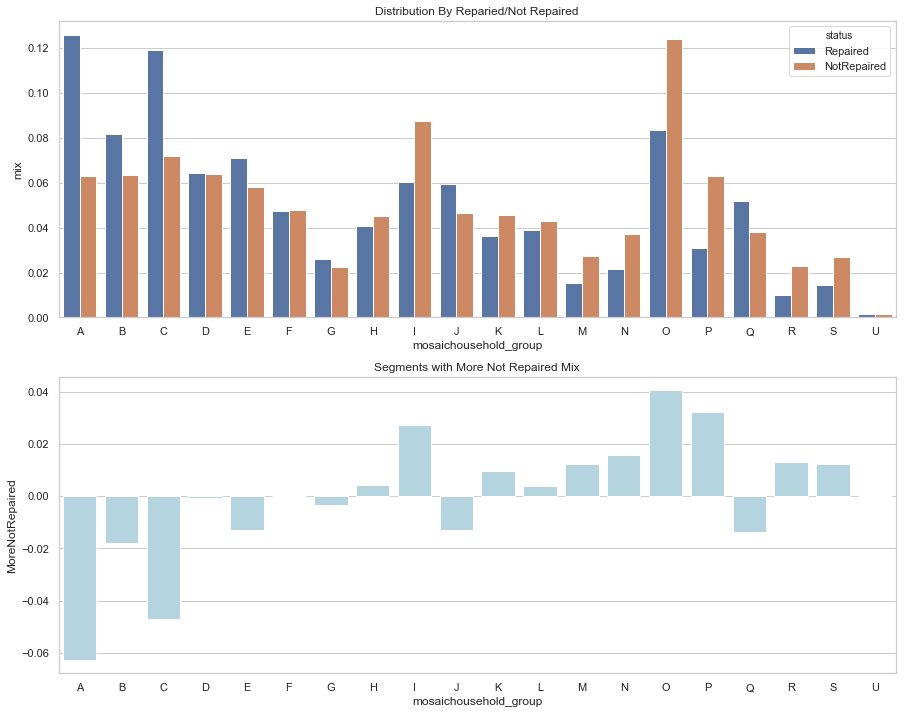

In [70]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(2, 1, figsize=(15, 12))

# ax1: Distribution
t1 = df[df.repaired==1].mosaichousehold_group.value_counts(normalize=True).to_frame().reset_index().sort_values(by='index')
t1['status'] = 'Repaired'
t2 = df[df.repaired==0].mosaichousehold_group.value_counts(normalize=True).to_frame().reset_index().sort_values(by='index')
t2['status'] = 'NotRepaired'
t1 = pd.concat([t1, t2], axis=0)
t1.rename(columns={'index':'mosaichousehold_group', 'mosaichousehold_group':'mix'}, inplace=True)
ax0 = sns.barplot(x='mosaichousehold_group', y='mix', hue='status', data=t1, ax=ax[0])
ax0.title.set_text('Distribution By Reparied/Not Repaired')

# ax2: distribution difference
t1 = df[df.repaired==1].mosaichousehold_group.value_counts(normalize=True).to_frame().reset_index().sort_values(by='index')
t1 = t1.merge(df[df.repaired==0].mosaichousehold_group.value_counts(normalize=True).to_frame().reset_index().sort_values(by='index'),
              on='index')
t1.rename(columns={'index':'mosaichousehold_group', 'mosaichousehold_group_x':'Repaired', 'mosaichousehold_group_y': 'NotRepaired'},
         inplace=True)
t1['MoreNotRepaired'] = t1.NotRepaired - t1.Repaired
ax1 = sns.barplot(x='mosaichousehold_group', y='MoreNotRepaired', data=t1, color='lightblue', ax=ax[1])
ax1.title.set_text('Segments with More Not Repaired Mix')

### Top 3 Underperforming Segment Groups

In [72]:
t1 = t1.sort_values(by='MoreNotRepaired', ascending=False).head(3)
t1

,mosaichousehold_group,Repaired,NotRepaired,MoreNotRepaired
14,O,0.083394,0.123985,0.040591
15,P,0.031068,0.063227,0.032158
8,I,0.060355,0.087628,0.027273


In [74]:
top_groups = t1.mosaichousehold_group.tolist()
for i in top_groups:
    print(mosaic_group[i])

O Singles and Starters
P Cultural Connections
I Family Union


### Segment Type Repaired vs. Not Repaired

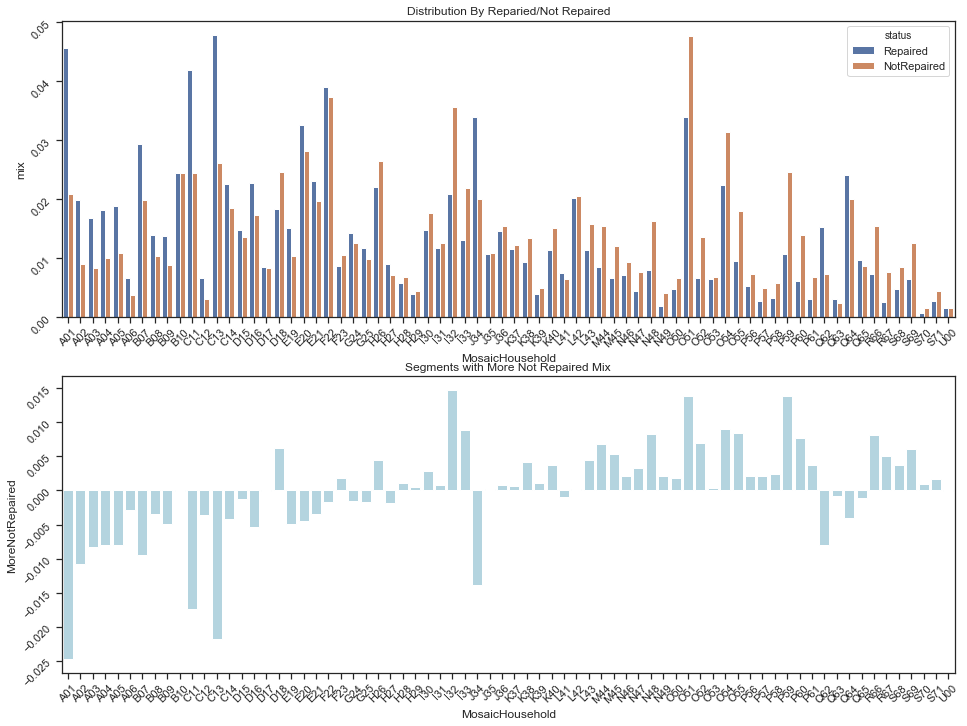

In [61]:
sns.set(style='ticks')
fig, ax = plt.subplots(2, 1, figsize=(16, 12))

# ax1: Distribution
t1 = df[df.repaired==1].MosaicHousehold.value_counts(normalize=True).to_frame().reset_index().sort_values(by='index')
t1['status'] = 'Repaired'
t2 = df[df.repaired==0].MosaicHousehold.value_counts(normalize=True).to_frame().reset_index().sort_values(by='index')
t2['status'] = 'NotRepaired'
t1 = pd.concat([t1, t2], axis=0)
t1.rename(columns={'index':'MosaicHousehold', 'MosaicHousehold':'mix'}, inplace=True)
ax0 = sns.barplot(x='MosaicHousehold', y='mix', hue='status', data=t1, ax=ax[0])
ax0.title.set_text('Distribution By Reparied/Not Repaired')
ax0.tick_params(labelrotation=45)

# ax2: distribution difference
t1 = df[df.repaired==1].MosaicHousehold.value_counts(normalize=True).to_frame().reset_index().sort_values(by='index')
t1 = t1.merge(df[df.repaired==0].MosaicHousehold.value_counts(normalize=True).to_frame().reset_index().sort_values(by='index'),
              on='index')
t1.rename(columns={'index':'MosaicHousehold', 'MosaicHousehold_x':'Repaired', 'MosaicHousehold_y': 'NotRepaired'},
         inplace=True)
t1['MoreNotRepaired'] = t1.NotRepaired - t1.Repaired
ax1 = sns.barplot(x='MosaicHousehold', y='MoreNotRepaired', data=t1, color='lightblue', ax=ax[1])
ax1.title.set_text('Segments with More Not Repaired Mix')
ax1.tick_params(labelrotation=45)

### Top 10 Underperforming Segment Types

In [66]:
t1 = t1.sort_values(by='MoreNotRepaired', ascending=False).head(10)
t1

,MosaicHousehold,Repaired,NotRepaired,MoreNotRepaired
31,I32,0.020882,0.035669,0.014787
58,P59,0.010694,0.024593,0.013899
50,O51,0.033873,0.047692,0.013818
53,O54,0.022338,0.031350,0.009012
32,I33,0.013056,0.021872,0.008816
54,O55,0.009442,0.017925,0.008483
47,N48,0.007915,0.016261,0.008346
65,R66,0.007323,0.015479,0.008155
59,P60,0.006164,0.013926,0.007763
51,O52,0.006578,0.013589,0.007011


In [69]:
top_types = t1.MosaicHousehold.tolist()
for i in top_types:
    print(mosaic_type[i])

I32 Steadfast Conventionalists
P59 Expanding Horizons
O51 Digital Dependents
O54 Striving Single Scene
I33 Balance and Harmony
O55 Family Troopers
N48 Rural Southern Bliss
R66 Dare to Dream
P60 Striving Forward
O52 Urban Ambition


# OEM Comparison (Not Repaired Only)

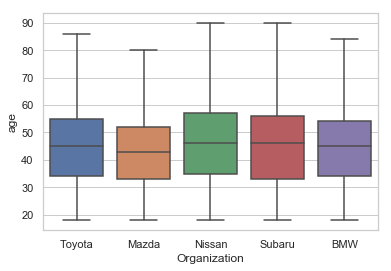

In [54]:
sns.boxplot(x='Organization', y='age', data=df[df.repaired==0], showfliers=False)

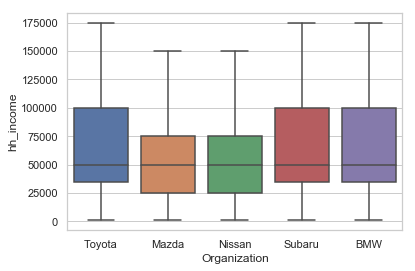

In [55]:
sns.boxplot(x='Organization', y='hh_income', data=df[df.repaired==0], showfliers=False)

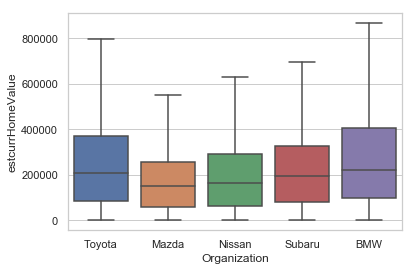

In [60]:
sns.boxplot(x='Organization', y='estcurrHomeValue', data=df[df.repaired==0], showfliers=False)

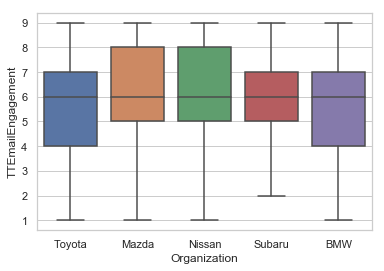

In [59]:
sns.boxplot(x='Organization', y='TTEmailEngagement', data=df[df.repaired==0], showfliers=False)